**This is heart disease classification code for Fusemachine AI Fellowship 2023 Machine learning Course Project**

**Swodesh Sharma**

**Nadika Poudel**

**Krishbin Poudel**

**Krishant Timilsina**

Dataset features explanation

* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (0 = normal; 1 = fixed defect; 2 = reversable defect).

* **target:** heart disease (0 = no, 1 = yes)


In [16]:
# Importing Necessary Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import f1_score
 
import pickle

In [17]:
df = pd.read_csv('heart_data.csv')
features = df.columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [18]:
features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [45]:
for i in df.columns:
    print(i," ",df[i].unique())

age   [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
sex   [1 0]
cp   [0 1 2 3]
trestbps   [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
chol   [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 169 290 341 247 172 167 183]
f

In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [21]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [22]:
df.shape

(297, 14)

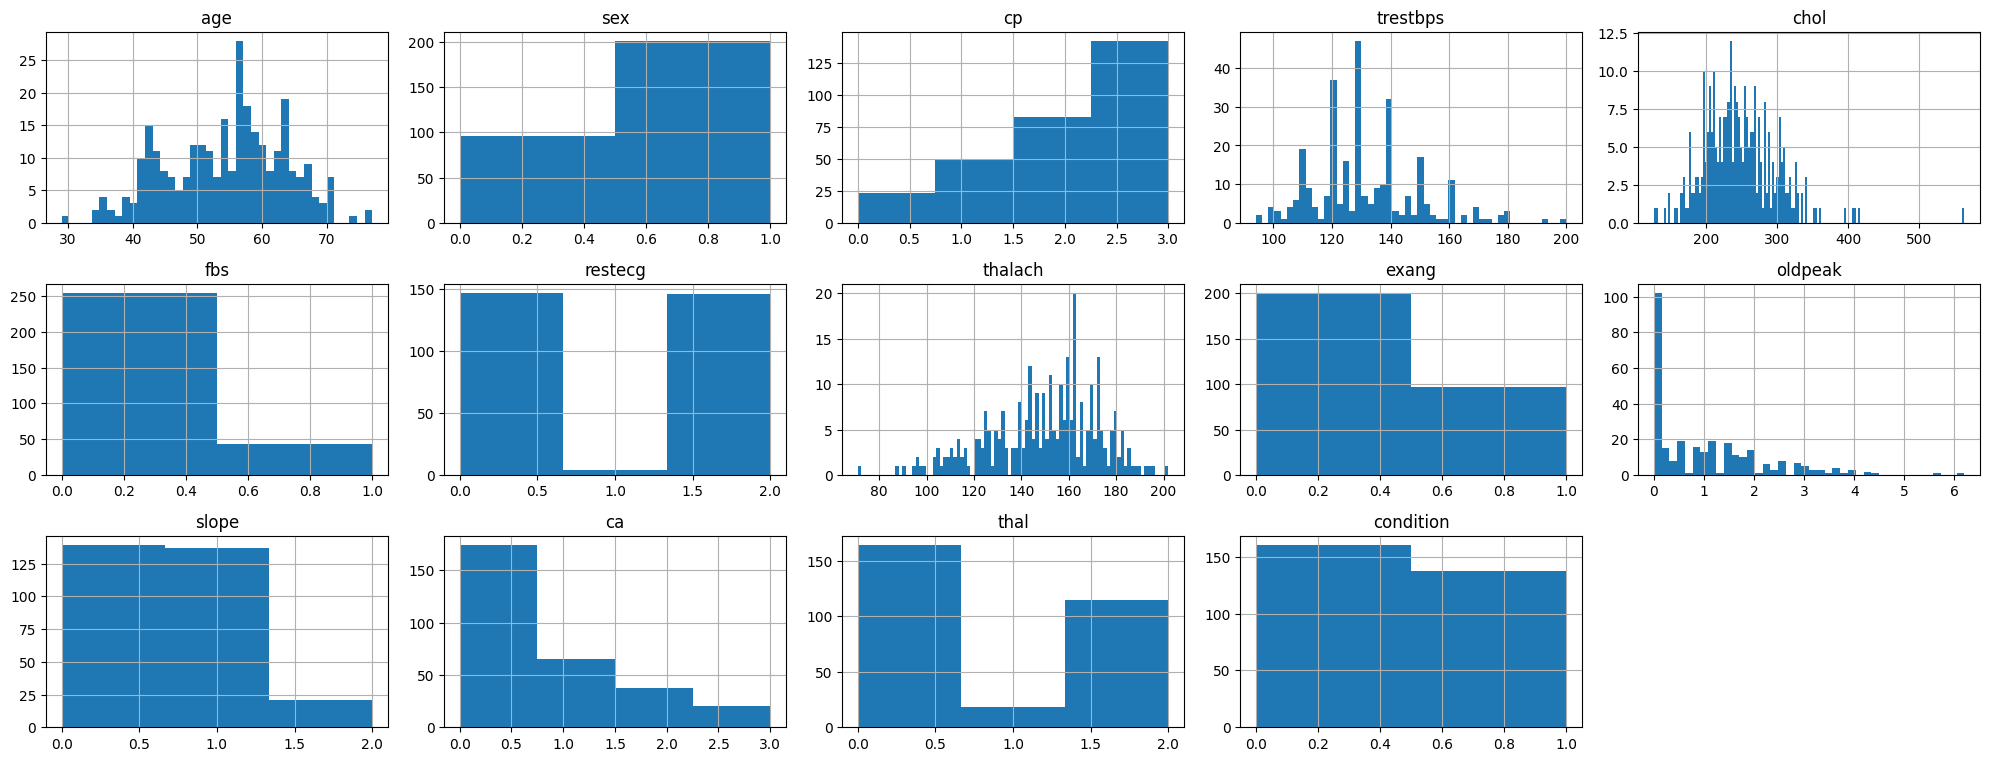

In [23]:
#Plotting Histogram
from math import sqrt    
def plot_hist(df, ncols=5):
    n = len(df.columns)
    nrows = round(n/ncols) + 1
    f = plt.figure()
    for indx in range(n):
        col = df.columns[indx]
        f.set_figheight(10)
        f.set_figwidth(20)
        plt.subplot(nrows, ncols, indx+1, title=col)
        df[col].hist(bins=len(df[col].unique()))

    plt.tight_layout()
    plt.show()
plot_hist(df)

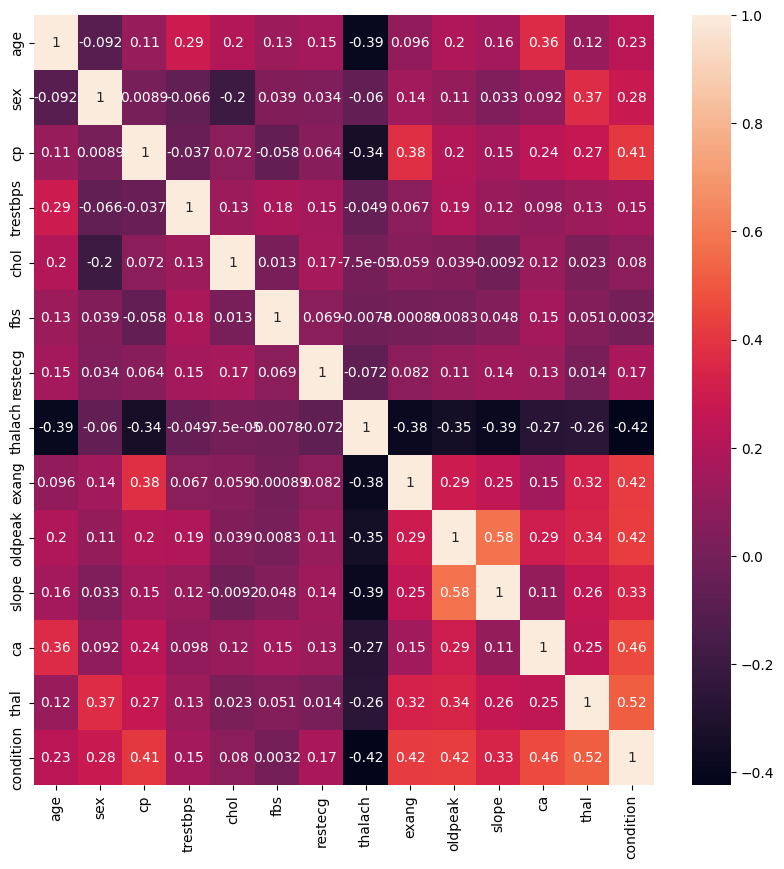

In [24]:
#Heatmap of correlation
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [25]:
X =  df[features[:-1]]
y =  df[features[-1]]
corr = X.corrwith(y)
ascend_corr = np.abs(corr).sort_values(ascending=False).iloc[0:len(features)].index
corr[ascend_corr] 

thal        0.520516
ca          0.463189
oldpeak     0.424052
thalach    -0.423817
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
dtype: float64

In [26]:
corr_list = corr[ascend_corr].index.tolist()
corr_list

['thal',
 'ca',
 'oldpeak',
 'thalach',
 'exang',
 'cp',
 'slope',
 'sex',
 'age',
 'restecg',
 'trestbps',
 'chol',
 'fbs']

In [27]:
from sklearn.metrics import r2_score

for i in range(1,len(corr_list)):
    temp_x = X[corr_list[:i]]
    model = LogisticRegression()
    model.fit(temp_x, y)
    y_pred = model.predict(temp_x) 
    r2 = r2_score(y, y_pred) 
    n = len(y)
    p = temp_x.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print("Adjusted R^2 Score for " + str(i) + " features:", adj_r2)

Adjusted R^2 Score for 1 features: 0.04833601385624142
Adjusted R^2 Score for 2 features: 0.15423059734842837
Adjusted R^2 Score for 3 features: 0.26084801076206365
Adjusted R^2 Score for 4 features: 0.28578642135786425
Adjusted R^2 Score for 5 features: 0.338460380766047
Adjusted R^2 Score for 6 features: 0.363838409262522
Adjusted R^2 Score for 7 features: 0.3616371580834996
Adjusted R^2 Score for 8 features: 0.40119753649635037
Adjusted R^2 Score for 9 features: 0.3851369566876064
Adjusted R^2 Score for 10 features: 0.3970101066816395
Adjusted R^2 Score for 11 features: 0.40896657702650785
Adjusted R^2 Score for 12 features: 0.40688547342448855


**Since using all the features gives us max r2 score we will use all the features**

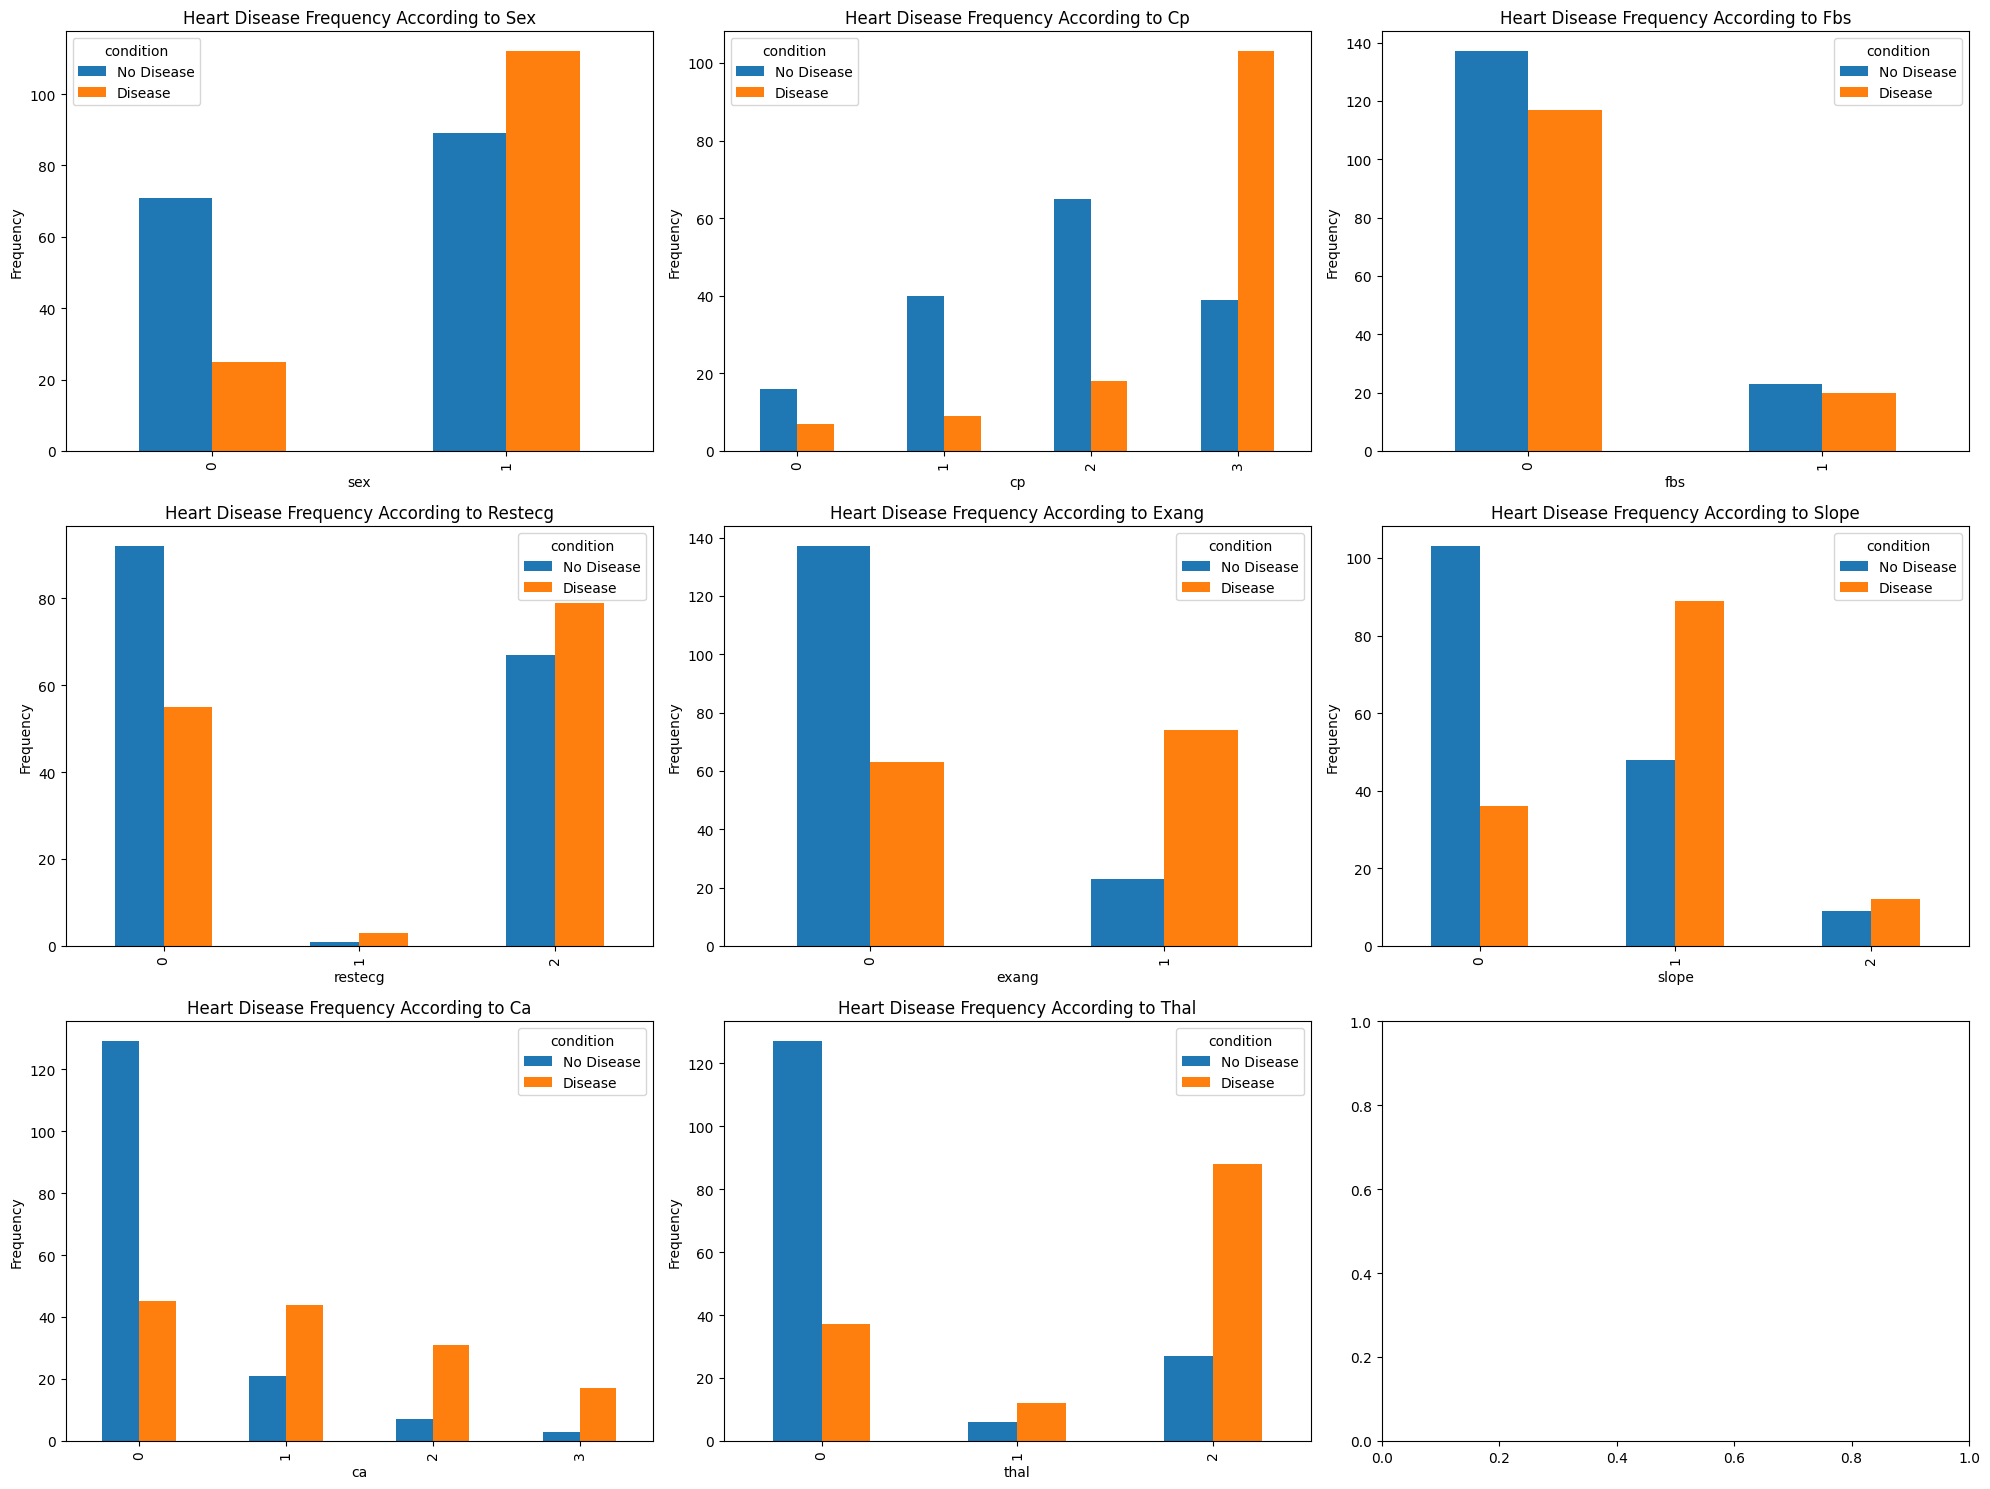

In [28]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
target = 'condition'
for i in range(0, len(cat_features)):
    temp = pd.crosstab(df[cat_features[i]], df[target])
    temp.plot(kind='bar', ax=ax[i//3][i%3] )
    ax[i//3][i%3].set_title('Heart Disease Frequency According to ' + cat_features[i].title())
    ax[i//3][i%3].set_xlabel(cat_features[i])
    ax[i//3][i%3].set_ylabel('Frequency')
    ax[i//3][i%3].legend(title= target, labels=['No Disease', 'Disease'])


plt.tight_layout()
plt.show()


In [29]:
#Checking for multicollinearity
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute correlation value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
names = correlation(X, 0.8)
print(names)

set()


Since there is no features with high correlation among each other there is very less multicollinearity

In [31]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [33]:
X_scaled

array([[ 1.60030243,  0.69109474, -2.24062879, ...,  0.6437811 ,
         0.34482438, -0.87429153],
       [ 1.60030243, -1.44697961, -2.24062879, ..., -0.97658319,
         1.41162482, -0.87429153],
       [ 1.26824154, -1.44697961, -2.24062879, ...,  2.26414539,
        -0.72197605, -0.87429153],
       ...,
       [-2.16305433,  0.69109474,  0.87388018, ...,  0.6437811 ,
        -0.72197605,  1.21977769],
       [-2.16305433, -1.44697961,  0.87388018, ..., -0.97658319,
        -0.72197605, -0.87429153],
       [-2.16305433,  0.69109474,  0.87388018, ..., -0.97658319,
        -0.72197605,  1.21977769]])

In [34]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,stratify = y, random_state = 0)
train_features = X_train
test_features = X_test


In [35]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def fit_eval_model(model, train_features, y_train, test_features, y_test):
    model.fit(train_features, y_train) 
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features) 
    f1score = f1_score(y_test, test_predicted)
    cm = confusion_matrix(y_test, test_predicted)
    return f1score, cm
  

In [36]:
sv = SVC(random_state=1)
log_reg = LogisticRegression(random_state=1)
rf = RandomForestClassifier(random_state=1)
ab = AdaBoostClassifier(random_state=1)
gb = GradientBoostingClassifier(random_state=1)

SVC F1 score: 0.8518518518518519
LogisticRegression F1 score: 0.8518518518518519
RandomForestClassifier F1 score: 0.8771929824561403
AdaBoostClassifier F1 score: 0.8363636363636364
GradientBoostingClassifier F1 score: 0.8727272727272727


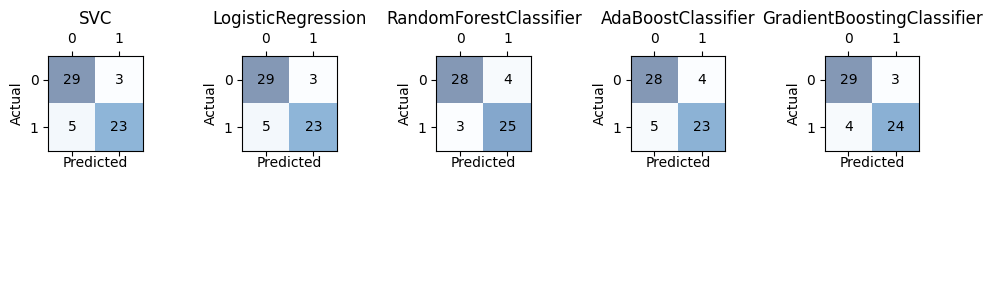

In [37]:
models = [sv, log_reg, rf, ab, gb]
fig, axs = plt.subplots(nrows=2, ncols=len(models), figsize=(10, 3))
for i, model in enumerate(models):
    f1score, cm = fit_eval_model(model, train_features, y_train, test_features, y_test)
    print(model.__class__.__name__, "F1 score:", f1score)
    ax1 = axs[0, i]
    ax1.set_title(model.__class__.__name__)
    ax1.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            ax1.text(k, j, str(cm[j, k]), va='center', ha='center')
    ax2 = axs[1, i]
    ax2.axis('off')
plt.tight_layout()
plt.show()

**Hence We will choose GradientBoostingClassifier**

In [38]:
def learning_curve(model, X_train, y_train, X_test, y_test):
    """
    A function to plot the learning curve.
    
    Paramters:
    ---------
    model: object
           An object instantiated with AdaBoost classifier
    X_train: array like
             Training features
    y_train: array like
             Training labels
    X_test: array like
            Validation features
    y_test: array like
            Validation labels
            
    Returns:
    --------
    None
    
            
    """
    model.fit(X_train, y_train)
    print("F1 Score Train: ",f1_score(y_train, model.predict(X_train), average = 'weighted'))
    print("F1 Score Test: ",f1_score(y_test, model.predict(X_test), average = 'weighted'))
    train_errors = []
    test_errors = []
    for n_estimators in range(1, 100, 10):
        model.set_params(n_estimators=n_estimators)
        model.fit(X_train, y_train)
        train_errors.append(1 - f1_score(y_train, model.predict(X_train), average = 'weighted'))
        test_errors.append(1 - f1_score(y_test, model.predict(X_test), average = 'weighted'))
    plt.figure(figsize = (8,8))
    plt.plot(range(1, 100, 10), train_errors, label = 'Training')
    plt.plot(range(1, 100, 10), test_errors, label = 'Validation')
    plt.legend()
    plt.xlabel("Number of trees")
    plt.ylabel("Error")
    plt.title("Learning Curve")
    plt.show()

F1 Score Train:  0.9239250516430215
F1 Score Test:  0.8831701631701632


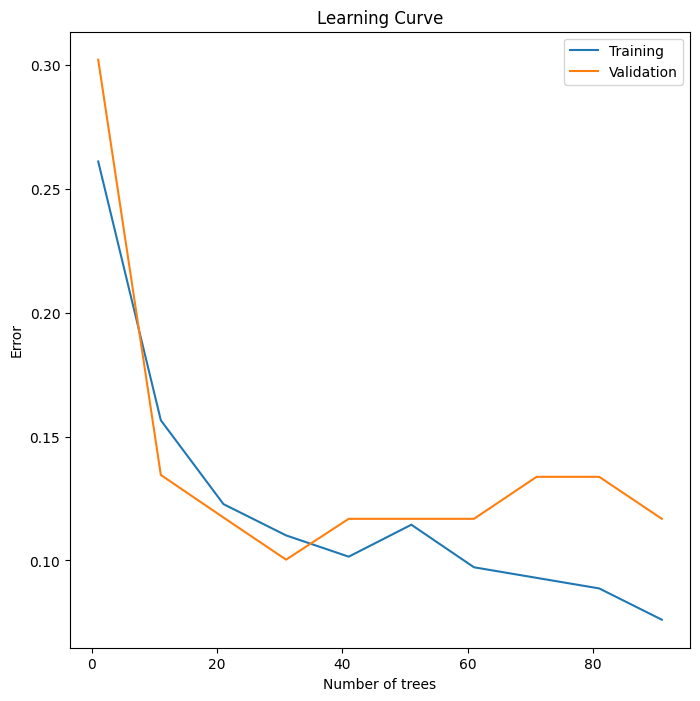

In [39]:
model_gb = GradientBoostingClassifier(n_estimators = 100 ,max_depth = 2,learning_rate = 0.1, random_state = 0)
learning_curve(model_gb, X_train, y_train, X_test, y_test)

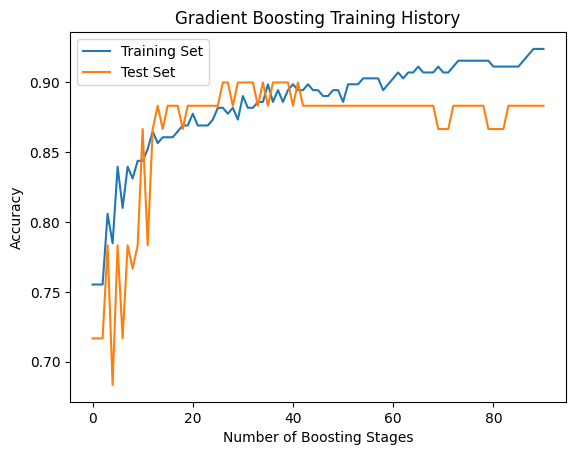

In [40]:
train_acc = []
test_acc = []
for y_pred in model_gb.staged_predict(X_train):
    train_acc.append(np.mean(y_pred == y_train))
for y_pred in model_gb.staged_predict(X_test):
    test_acc.append(np.mean(y_pred == y_test))

# Plot the training history
plt.plot(train_acc, label='Training Set')
plt.plot(test_acc, label='Test Set')
plt.xlabel('Number of Boosting Stages')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Training History')
plt.legend()
plt.show()

In [41]:
# with open('gb_model.pkl', 'wb') as file:
#     pickle.dump(model_gb, file)
    
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

In [42]:
with open('gb_model.pkl', 'rb') as file:
    gb_loaded = pickle.load(file)
with open('scaler.pkl', 'rb') as file:
    scaler_loaded = pickle.load(file)

In [43]:
# # Prompt the user to input data for each feature
# age = float(input("Enter age: "))
# sex = float(input("Enter sex (0=female, 1=male): "))
# cp = float(input("Enter chest pain type (0-3): "))
# trestbps = float(input("Enter resting blood pressure: "))
# chol = float(input("Enter serum cholesterol: "))
# fbs = float(input("Enter fasting blood sugar (0=normal, 1=high): "))
# restecg = float(input("Enter resting electrocardiographic results (0-2): "))
# thalach = float(input("Enter maximum heart rate achieved: "))
# exang = float(input("Enter exercise induced angina (0=no, 1=yes): "))
# oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
# slope = float(input("Enter the slope of the peak exercise ST segment (0-2): "))
# ca = float(input("Enter number of major vessels colored by flourosopy (0-3): "))
# thal = float(input("Enter thalassemia (1-3): "))

# # Create a new DataFrame with the input data
# input_data = pd.DataFrame({'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps, 'chol': chol, 'fbs': fbs, 'restecg': restecg, 'thalach': thalach, 'exang': exang, 'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal}, index=[0])
# input_scaled = scaler_loaded.transform(input_data)
# # Use the trained model to predict the presence of heart disease for the input data
# prediction = gb_loaded.predict(input_scaled )

# if prediction[0] == 0:
#     print("The model predicts no presence of heart disease.")
# else:
#     print("The model predicts presence of heart disease.")